In [1]:
import pickle
import torch
import sys, os
import cv2 as cv
import h5py
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import transformations as tf
import numpy as np
from itertools import repeat

np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

In [2]:
act_path = "/home/zfei/code/act-plus-plus/"
sys.path.append(act_path)
from policy import EPACTPolicy, ACTPolicy, DINOPolicy
from brl_constants import TASK_CONFIGS
from utils import EpisodicDataset
from utils import find_all_hdf5, flatten_list, get_norm_stats
from utils import load_data, load_data_fix_val # data functions

ROBOMIMIC WARNING(
    No private macro file found!
    It is recommended to use a private macro file
    To setup, run: python /home/zfei/code/robomimic/robomimic/scripts/setup_macros.py
)


In [6]:
dataset_path_list = ['/mnt/data1/act/train_act_scara_sim-env-block-pick/data1/episode_0.hdf5']
camera_names = ['wrist', 'wrist_down']


In [7]:
norm_stats, _ = get_norm_stats(dataset_path_list)


In [19]:
policy_class = "ACTPolicy"
chunk_size = 2
train_episode_len = [333] 
train_episode_ids = [0]
train_dataset = EpisodicDataset(dataset_path_list, camera_names, norm_stats, train_episode_ids, train_episode_len, chunk_size, policy_class, target_seg_aug=True, resize=None)


augment_images:  False
target_seg_aug:  True
Initializing transformations


In [20]:
image_data, qpos_data, action_data, is_pad  = train_dataset[0]
print("image_data: ", image_data.shape)
print("qpos_data: ", qpos_data.shape)
print("action_data: ", action_data.shape)
print("is_pad: ", is_pad.shape)

image_data:  torch.Size([4, 3, 480, 640])
qpos_data:  torch.Size([4])
action_data:  torch.Size([2, 5])
is_pad:  torch.Size([2])


image_data_np:  (4, 480, 640, 3)


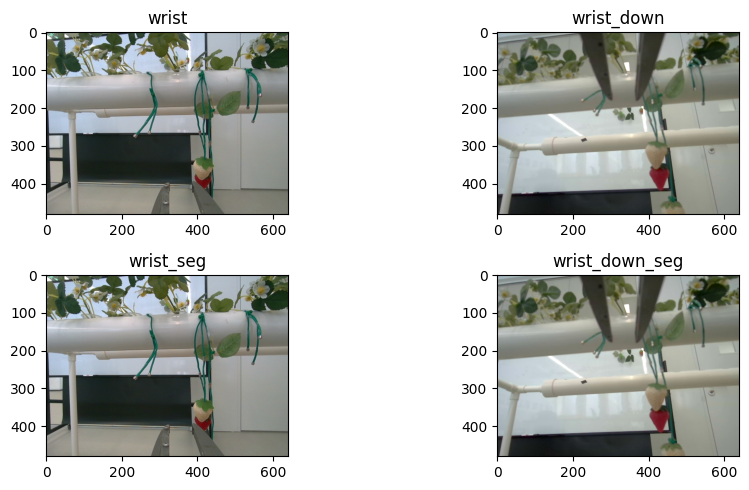

In [28]:
image_data_np = image_data.numpy()
image_data_np = image_data_np.transpose(0, 2, 3, 1)
print("image_data_np: ", image_data_np.shape)
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].imshow(cv.cvtColor(image_data_np[0], cv.COLOR_BGR2RGB))
ax[0, 0].set_title(camera_names[0])
ax[0, 1].imshow(cv.cvtColor(image_data_np[1], cv.COLOR_BGR2RGB))
ax[0, 1].set_title(camera_names[1])
ax[1, 0].imshow(cv.cvtColor(image_data_np[2], cv.COLOR_BGR2RGB))
ax[1, 0].set_title(camera_names[0]+"_seg")
ax[1, 1].imshow(cv.cvtColor(image_data_np[3], cv.COLOR_BGR2RGB))
ax[1, 1].set_title(camera_names[1]+"_seg")
plt.tight_layout()